In [102]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import norm,chisquare

In [103]:
t1_1,t2_1,t3_1,t4_1,a1_1,a2_1,a3_1,a4_1 = np.loadtxt('Position_1.txt',unpack=True)

delta_t_12_1 = t2_1-t1_1
delta_t_34_1 = t4_1-t3_1

t1_2,t2_2,t3_2,t4_2,a1_2,a2_2,a3_2,a4_2 = np.loadtxt('Position_2.txt',unpack=True)

delta_t_12_2=t2_2-t1_2
delta_t_34_2=t4_2-t3_2


t1_3,t2_3,t3_3,t4_3,a1_3,a3_3,a3_3,a4_3 = np.loadtxt('Position_3.txt',unpack=True)

delta_t_12_3=t2_3-t1_3
delta_t_34_3=t4_3-t3_3

print(t1_1.shape)

(5000,)


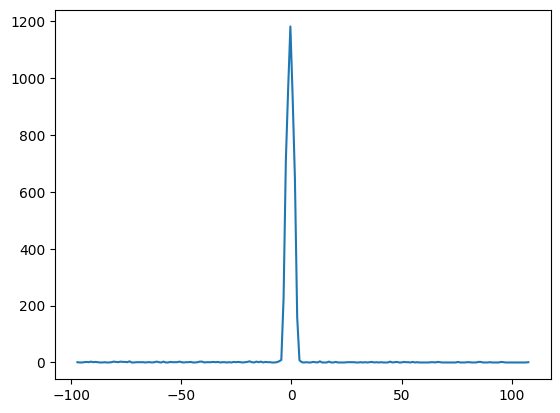

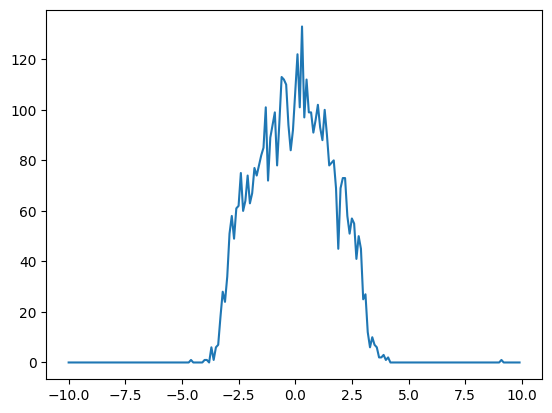

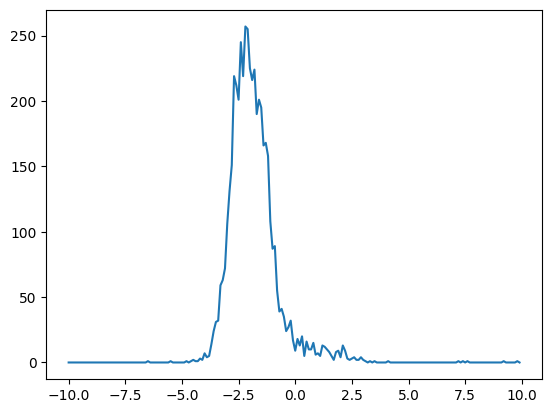

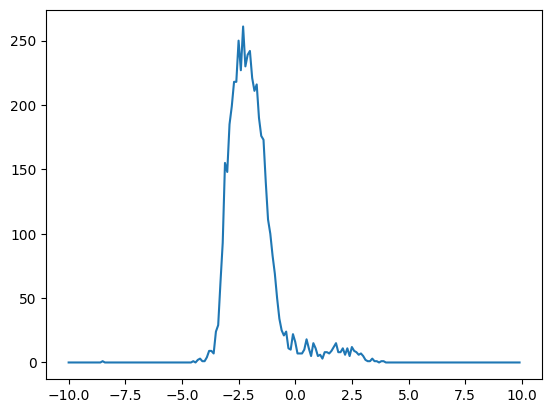

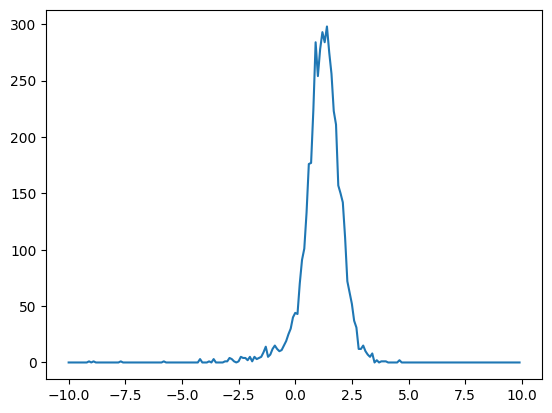

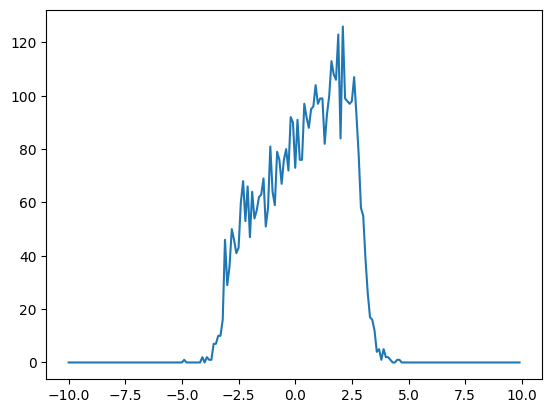

In [104]:
# freq12_1,bins12_1=np.histogram(delta_t_12_1,bins=round(np.sqrt(5000)),range=(-10,10))
freq12_1,bins12_1=np.histogram(delta_t_12_1,bins=200)
plt.plot(bins12_1[:-1],freq12_1)
plt.show()

freq34_1,bins34_1=np.histogram(delta_t_34_1,bins=200,range=(-10,10))
plt.plot(bins34_1[:-1],freq34_1)
plt.show()


freq12_2,bins12_2=np.histogram(delta_t_12_2,bins=200,range=(-10,10))
plt.plot(bins12_2[:-1],freq12_2)
plt.show()

freq34_2,bins34_2=np.histogram(delta_t_34_2,bins=200,range=(-10,10))
plt.plot(bins34_2[:-1],freq34_2)
plt.show()

freq12_3,bins12_3=np.histogram(delta_t_12_3,bins=200,range=(-10,10))
plt.plot(bins12_3[:-1],freq12_3)
plt.show()

freq34_3,bins34_3=np.histogram(delta_t_34_3,bins=200,range=(-10,10))
plt.plot(bins34_3[:-1],freq34_3)
plt.show()




(6, 200)
Fitted parameters: [ 1.17917287e+03 -5.53615597e-01  2.45157104e+00]
Covariance matrix: [[ 2.30506166e+05  6.63113820e-06 -3.19484776e+02]
 [ 6.63113820e-06  6.64215538e-01  6.24391000e-09]
 [-3.19484776e+02  6.24391000e-09  1.32843113e+00]]
Chisquare: nan
P-value: nan
197
Chisquare reduced: nan


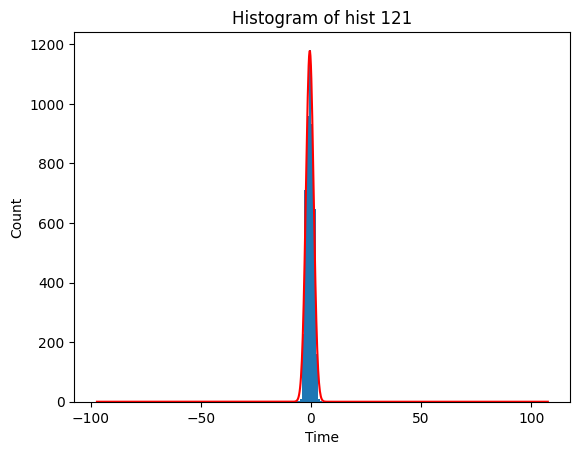

Fitted parameters: [ 1.10158951e+02 -2.66139144e-02  2.65623020e+00]
Covariance matrix: [[ 1.05875157e+02 -1.65171983e-08 -1.70198139e+00]
 [-1.65171983e-08  4.10399333e-02 -3.16292083e-09]
 [-1.70198139e+00 -3.16292083e-09  8.20798977e-02]]
Chisquare: 1714.9323526699345
P-value: 4.076883651698494e-239
197
Chisquare reduced: 8.705240368882917


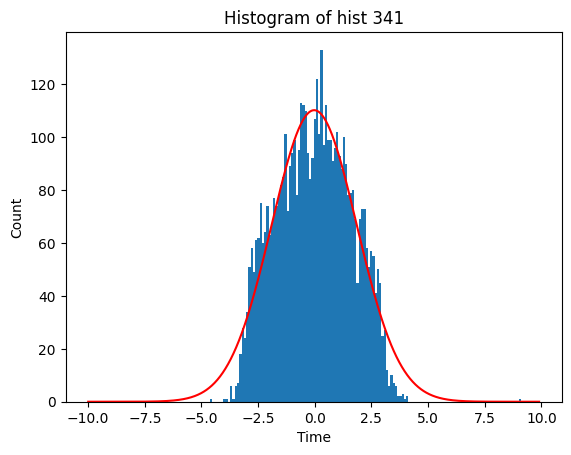

Fitted parameters: [245.5521956   -2.05224225   1.07147445]
Covariance matrix: [[ 1.53330461e+03  1.20867457e-07 -4.46034781e+00]
 [ 1.20867457e-07  1.94625736e-02 -4.80899678e-10]
 [-4.46034781e+00 -4.80899678e-10  3.89251480e-02]]
Chisquare: 5.377790450901359e+50
P-value: 0.0
197
Chisquare reduced: 2.729842868477847e+48


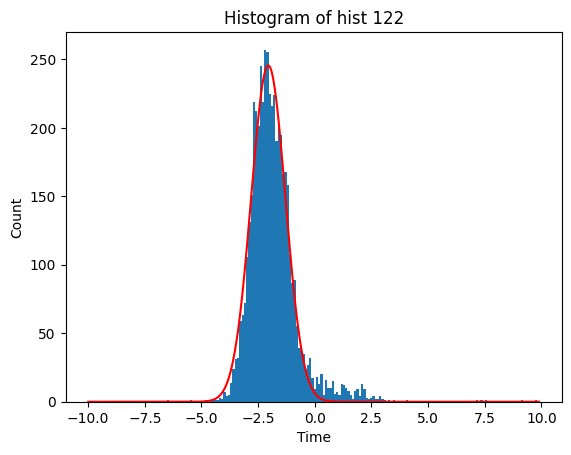

Fitted parameters: [255.33833225  -2.16215178   1.05889751]
Covariance matrix: [[ 1.78752542e+03  1.71894714e-07 -4.94200637e+00]
 [ 1.71894714e-07  2.04948921e-02 -7.30671946e-10]
 [-4.94200637e+00 -7.30671946e-10  4.09897844e-02]]
Chisquare: 14537177676160.16
P-value: 0.0
197
Chisquare reduced: 73792780082.03127


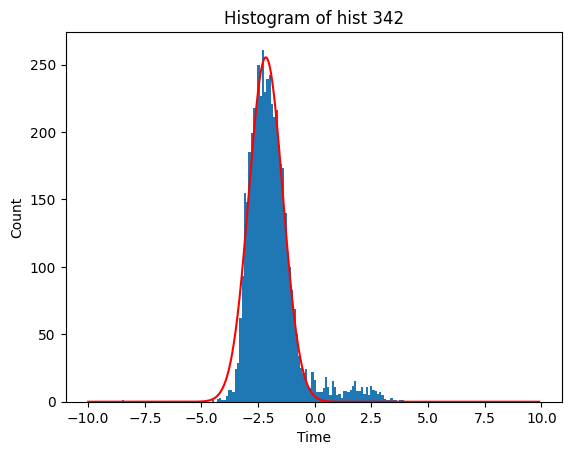

Fitted parameters: [291.17874541   1.27153328  -0.90760798]
Covariance matrix: [[3.22345025e+00 1.47116427e-10 6.69840622e-03]
 [1.47116427e-10 2.08791702e-05 4.47509689e-13]
 [6.69840622e-03 4.47509689e-13 4.17583411e-05]]
Chisquare: 1.7062086305906178e+54
P-value: 0.0
197
Chisquare reduced: 8.660957515688415e+51


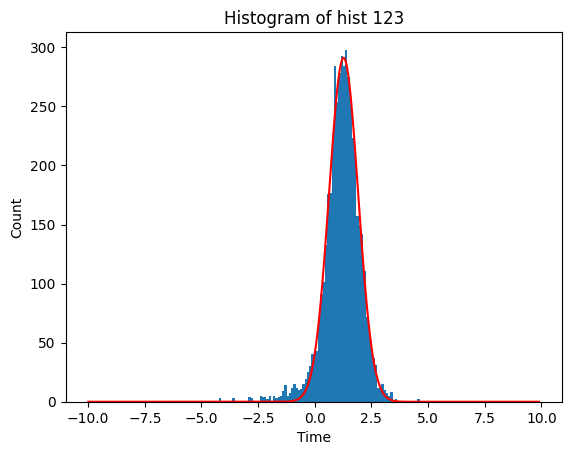

Fitted parameters: [102.61905407   0.6226316    2.8438273 ]
Covariance matrix: [[ 1.04979304e+00 -4.04009983e-11 -1.93954353e-02]
 [-4.04009983e-11  5.37510082e-04  5.95869851e-13]
 [-1.93954353e-02  5.95869851e-13  1.07502020e-03]]
Chisquare: 895.0668157037916
P-value: 7.60309914296607e-89
197
Chisquare reduced: 4.5434863741309215


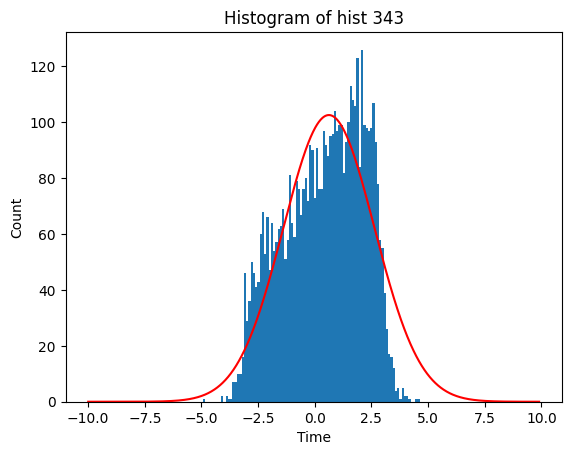

In [105]:




# Define gaussian function
def gaussian(x, a, b, c):
    return a * np.exp(-((x - b) / c) ** 2)

hist=[12_1,34_1,12_2,34_2,12_3,34_3]
counts=np.stack([freq12_1,freq34_1,freq12_2,freq34_2,freq12_3,freq34_3],axis=0)
times=np.stack([bins12_1[:-1],bins34_1[:-1],bins12_2[:-1],bins34_2[:-1],bins12_3[:-1],bins34_3[:-1] ],axis=0)

print(np.shape(counts))

p0_list=[(120,0,0.3318),(120, 0 , 3.03266025),(128, 9.02490361,  2.91871235),(140, -2.4,  2.88231386),(97,9.36570895, 2.84337087),(100, 2.03798281, 2.89832761)]

s=[]
ds=[]
T=[]
dT=[]

for i in range(6):
    
    if i<=3:
        sigma1=[np.var(counts[i,:])/30]*200
    else:
        sigma1=[np.sqrt(np.mean(counts[i,:]))]*200
    
    # Fit gaussian function with curve_fit
    # Use bounds to fix b to 0 and let a and c vary
    popt, pcov = curve_fit(gaussian, times[i,:], counts[i,:],p0=p0_list[i],sigma=sigma1,absolute_sigma=True)
    
    # Print fitted parameters and covariance matrix
    print("Fitted parameters:", popt)
    print("Covariance matrix:", pcov)
    s=np.append(s,popt[2])
    T=np.append(T,popt[1])
    ds=np.append(ds,np.sqrt(pcov[2,2]))
    dT=np.append(dT,np.sqrt(pcov[1,1]))
    # Plot histogram and fitted function
    plt.hist(times[i,:], weights=counts[i,:], bins=200,)
    plt.xlabel("Time")
    plt.ylabel("Count")
    plt.title(f"Histogram of hist {hist[i]}")
    
    x = np.linspace(min(times[i,:]), max(times[i,:]), 1000)
    y = gaussian(x, *popt)
    plt.plot(x, y, 'r-', label="Fitted curve")
    '''
    x_test = np.linspace(min(times[i,:]), max(times[i,:]), 1000)
    y_test = gaussian(x,1.75000000e+02,-0,2.15270818 )
    plt.plot(x_test, y_test, 'y-', label="Fitted curve")
    plt.legend()
    plt.show()
    '''
    
    
    # Calculate expected frequencies from fitted function
    expected = gaussian(times[i,:], *popt)
    # Scale expected frequencies by ratio of sums
    ratio = sum(counts[i,:]) / sum(expected)
    expected = expected * ratio
    
    
    # Calculate chisquare and p-value
    chisq, p = chisquare(counts[i,:], expected)
    
    
    
    # Print results
    print("Chisquare:", chisq)
    print("P-value:", p)
    
    # Calculate chisquare reduced
    
    dof= len(times[i,:]) - 3
    print(dof)
    chisq_red = chisq / dof
    print("Chisquare reduced:", chisq_red)
    plt.show()

Ricavo Posizioni

In [106]:

popt0_34=(1.38102492e-1)
popt1_34=-3.04900987
 
popt0_12=1.26514012e-1
popt1_12=-2.86058244


position1_12=(T[0]-popt1_12)/popt0_12
position1_34=(T[1]-popt1_34)/popt0_34

position2_12=(T[2]-popt1_12)/popt0_12
position2_34=(T[3]-popt1_34)/popt0_34

position3_12=(T[4]-popt1_12)/popt0_12
position3_34=(T[5]-popt1_34)/popt0_34

print(position1_12)
print(position1_34)
print(position2_12)
print(position2_34)
print(position3_12)
print(position3_34)



18.234872224767663
21.88516595043618
6.389333336374281
6.421738484362189
32.661328621863326
26.586352065658104


In [107]:
popt0_34=1/6.90512457e-09
popt1_34=-1.07549696e-11
 
T=T*1e-7

#position1_12=(T[0]-popt1_12)/popt0_12
position1_34=(popt0_34/2)*(T[1]-popt1_34)+22

#position2_12=(T[2]-popt1_12)/popt0_12
position2_34=(popt0_34/2)*(T[3]-popt1_34)+22

#position3_12=(T[4]-popt1_12)/popt0_12
position3_34=(popt0_34/2)*(T[5]-popt1_34)+22

print(position1_34)
print(position2_34)
print(position3_34)

21.808067440011328
6.344639906754944
26.509253575658025
